In [1]:
%matplotlib notebook

In [2]:
# Dependencies.
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [3]:
csv_path_2015 = Path("Data_Ref_2015.csv")
csv_path_2017 = Path("Data_Ref_2017.csv")
csv_path_2018 = Path("Data_Ref_2018.csv")
csv_path_2020 = Path("Data_Ref_2020.csv")
csv_path_2022 = Path("Data_Ref_2022.csv")

In [4]:
low_memory=False
CD15 = pd.read_csv(csv_path_2015)
CD17 = pd.read_csv(csv_path_2017)
CD18 = pd.read_csv(csv_path_2018)
CD20 = pd.read_csv(csv_path_2020)
CD22 = pd.read_csv(csv_path_2022)

C:\Users\EFMel\AppData\Local\Temp\ipykernel_33644\132651849.py:6: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  CD22 = pd.read_csv(csv_path_2022)


In [5]:
CD22["incident_id"] = CD22["incident_id"].astype(np.int64)

In [6]:
# Isolate number of unique incident ID's for reference.
Incidents15 = len(CD15["incident_id"].unique())
Incidents17 = len(CD17["INCIDENT_ID"].unique())
Incidents18 = len(CD18["INCIDENT_ID"].unique())
Incidents20 = len(CD20["INCIDENT_ID"].unique())
Incidents22 = len(CD22["incident_id"].unique())
Incident_Master = pd.DataFrame({"Year":[2015, 2017, 2018, 2020, 2022], 
                   "Incidents":[Incidents15, Incidents17, Incidents18, Incidents20, Incidents22]})
Incident_Master

,Year,Incidents
0,2015,457238
1,2017,409541
2,2018,461161
3,2020,409541
4,2022,402260


In [7]:
Offenses15 = len(CD15["offense_id"].unique())
Offenses17 = len(CD17["OFFENSE_ID"].unique())
Offenses18 = len(CD18["OFFENSE_ID"].unique())
Offenses20 = len(CD20["OFFENSE_ID"].unique())
Offenses22 = len(CD22["offense_id"].unique())
Offenses_Master = pd.DataFrame({"Year":[2015, 2017, 2018, 2020, 2022], 
                   "Offenses":[Offenses15, Offenses17, Offenses18, Offenses20, Offenses22]})
Offenses_Master

,Year,Offenses
0,2015,510923
1,2017,473941
2,2018,527986
3,2020,473941
4,2022,467550


<IPython.core.display.Javascript object>


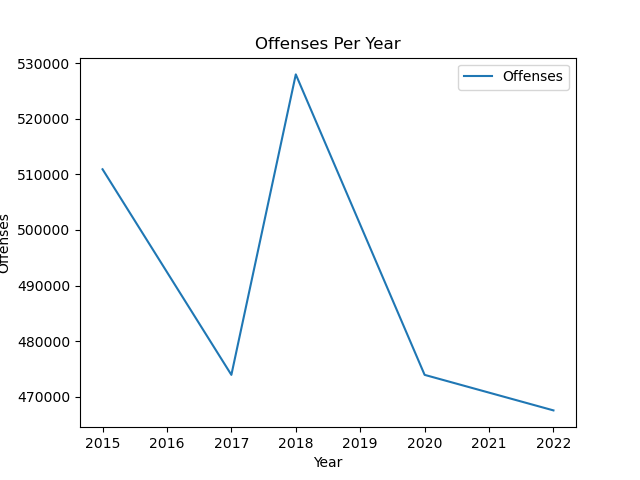

In [8]:
Offenses_Master.plot.line(y = "Offenses", x = "Year", title = "Offenses Per Year")
plt.xlabel("Year")
plt.ylabel("Offenses")
plt.savefig("Graphs/Offenses_per_year.png")

<IPython.core.display.Javascript object>


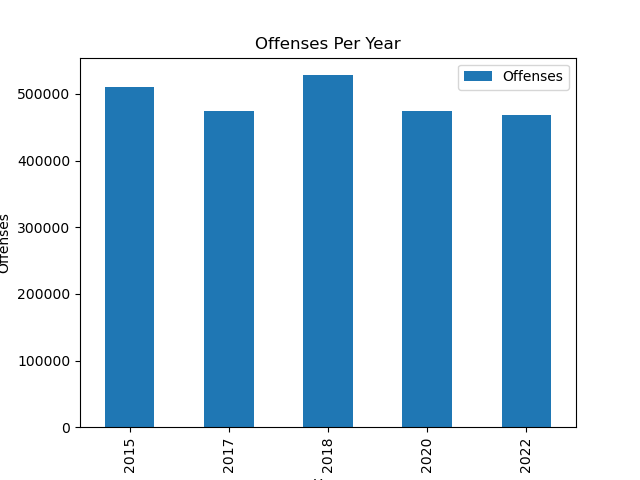

In [9]:
Offenses_Master.plot.bar(y = "Offenses", x = "Year", title = "Offenses Per Year")
plt.xlabel("Year")
plt.ylabel("Offenses")
plt.savefig("Graphs/Offenses_per_year_bar.png")

In [10]:
Race15 = CD15["race"].value_counts()
Race17 = CD17["RACE"].value_counts()
Race18 = CD18["RACE"].value_counts()
Race20 = CD20["RACE"].value_counts()
Race22 = CD22["race"].value_counts()
Race_Master = pd.DataFrame({
    2015:Race15, 
    2017:Race17,
    2018:Race18, 
    2020:Race20, 
    2022:Race22
}).fillna(0)
Race_Master

,2015,2017,2018,2020,2022
American Indian or Alaska Native,633.0,779.0,723.0,779.0,724
Asian,2804.0,1480.0,1962.0,1480.0,1673
Black or African American,220494.0,206174.0,238534.0,206174.0,203507
Native Hawaiian or Other Pacific Islander,205.0,301.0,334.0,301.0,526
Not Specified,0.0,0.0,0.0,0.0,101653
Unknown,174195.0,158937.0,170712.0,158937.0,60545
White,309963.0,276032.0,327807.0,276032.0,243526


<IPython.core.display.Javascript object>


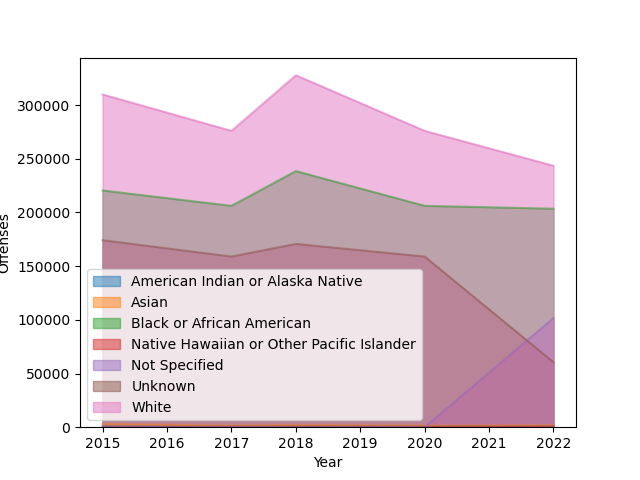

In [11]:
Race_Master.T.plot.area(stacked = False)
plt.legend(loc = "lower left")
plt.xlabel("Year")
plt.ylabel("Offenses")

plt.savefig("Graphs/Offenses_per_race_per_year.png")

In [12]:
Sex15 = CD15["sex_code_y"].value_counts()
Sex17 = CD17["SEX_CODE_y"].value_counts()
Sex18 = CD18["SEX_CODE_y"].value_counts()
Sex20 = CD20["SEX_CODE_y"].value_counts()
Sex22 = CD22["sex_code_y"].value_counts()
Sex_Master = pd.DataFrame({
    2015:Sex15, 
    2017:Sex17,
    2018:Sex18, 
    2020:Sex20, 
    2022:Sex22
}).fillna(0)
Sex_Master = Sex_Master.drop(["X"])
Sex_Master

,2015,2017,2018,2020,2022
F,167089.0,151709.0,181318.0,151709.0,138032
M,374854.0,341703.0,395638.0,341703.0,320550
U,71190.0,92652.0,105066.0,92652.0,51919


<IPython.core.display.Javascript object>


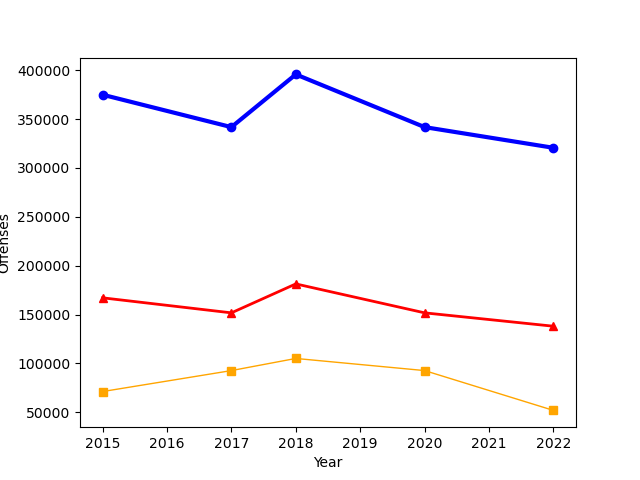

In [13]:
x_axis = [2015, 2017, 2018, 2020, 2022]
points_M = [374854, 341703, 395638, 341703, 320550]
points_F = [167089, 151709, 181318, 151709, 138032]
points_U = [71190, 92652, 105066, 92652, 51919]
male, = plt.plot(x_axis, points_M, marker = "o", color = "blue", linewidth = 3, label = "Male")
female, = plt.plot(x_axis, points_F, marker = "^", color = "red", linewidth = 2, label = "Female")
unknown, = plt.plot(x_axis, points_U, marker = "s", color = "orange", linewidth = 1, label = "Unknown")

plt.xlabel("Year")
plt.ylabel("Offenses")
plt.show()
plt.savefig("Graphs/Offenses_per_sex_per_year.png")

In [21]:
Location15 = CD15["location_name"].value_counts()
Location17 = CD17["LOCATION_NAME"].value_counts()
Location18 = CD18["LOCATION_NAME"].value_counts()
Location20 = CD20["LOCATION_NAME"].value_counts()
Location22 = CD22["location_name"].value_counts()
Location_Master = pd.DataFrame({
    2015:Location15, 
    2017:Location17,
    2018:Location18, 
    2020:Location20, 
    2022:Location22
}).fillna(0)
Location_Master

,2015,2017,2018,2020,2022
ATM Separate from Bank,565.0,475.0,927.0,475.0,376.0
Abandoned/Condemned Structure,945.0,729.0,654.0,729.0,494.0
Air/Bus/Train Terminal,951.0,642.0,1050.0,642.0,1408.0
Amusement Park,132.0,243.0,389.0,243.0,370.0
Arena/Stadium/Fairgrounds/Coliseum,465.0,264.0,541.0,264.0,426.0
Auto Dealership New/Used,1688.0,2455.0,2022.0,2455.0,2371.0
Bank/Savings and Loan,6200.0,4437.0,6324.0,4437.0,5750.0
Bar/Nightclub,3896.0,2496.0,3417.0,2496.0,4012.0
Camp/Campground,600.0,592.0,624.0,592.0,599.0
Church Synagogue/Temple,2356.0,0.0,0.0,0.0,0.0


<IPython.core.display.Javascript object>


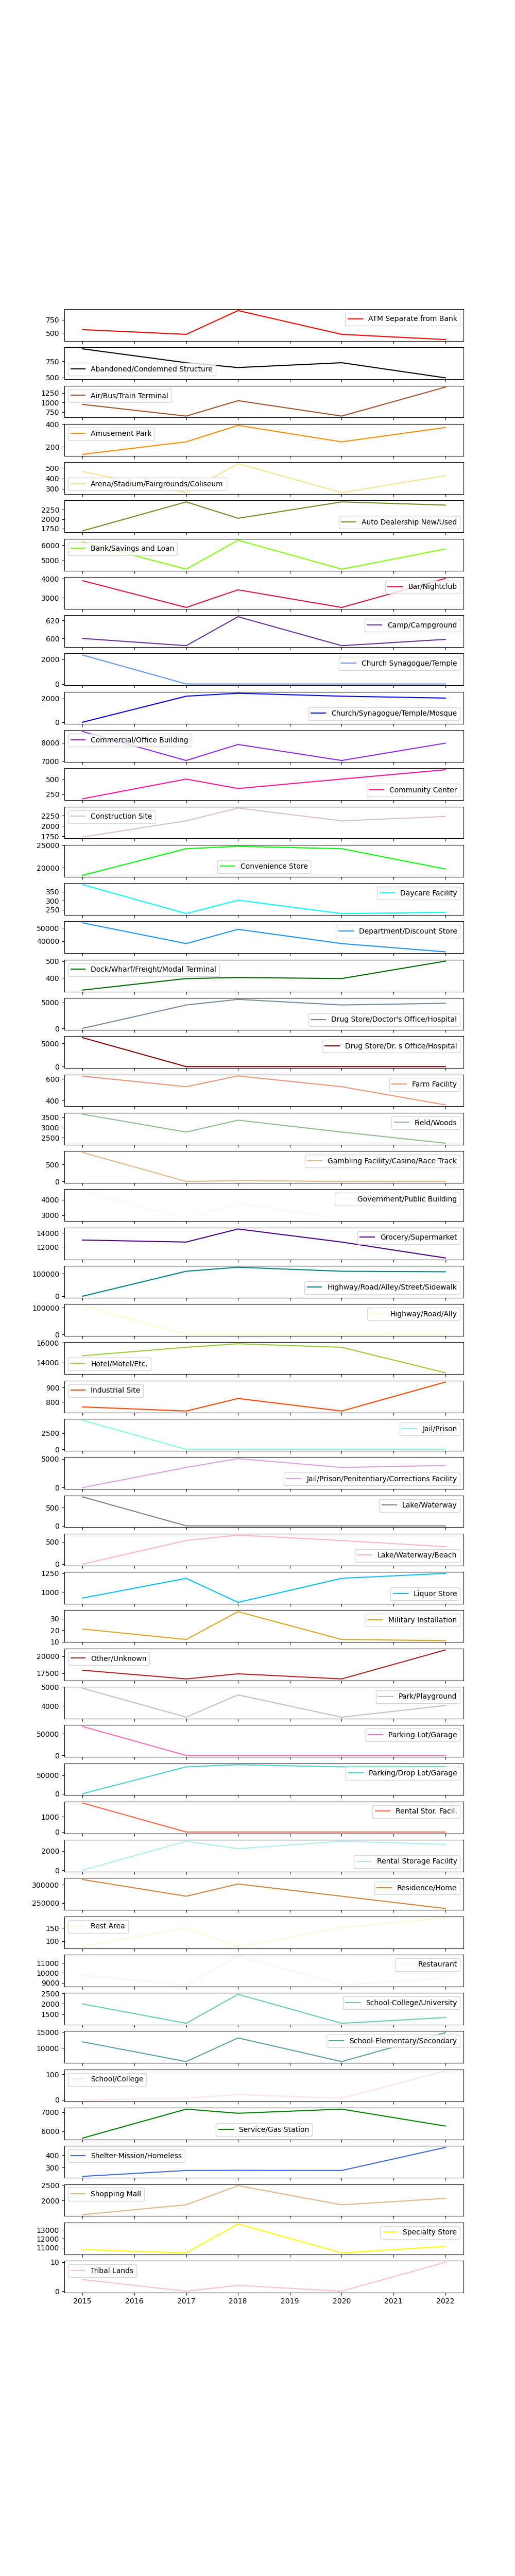

In [15]:
colors = ["red", 
          "black", 
          "sienna", 
          "darkorange", 
          "khaki", 
          "olivedrab", 
          "chartreuse", 
          "crimson", 
          "rebeccapurple", 
          "cornflowerblue", 
          "blue", 
          "blueviolet", 
          "deeppink", 
          "thistle", 
          "lime", 
          "aqua", 
          "dodgerblue", 
          "darkgreen", 
          "lightslategrey", 
          "maroon", 
          "darksalmon", 
          "darkseagreen", 
          "burlywood", 
          "ghostwhite", 
          "indigo", 
          "teal", 
          "lemonchiffon", 
          "yellowgreen", 
          "orangered", 
          "aquamarine", 
          "plum", 
          "gray", 
          "lightpink", 
          "deepskyblue", 
          "goldenrod", 
          "firebrick", 
          "silver", 
          "hotpink", 
          "mediumturquoise", 
          "tomato", 
          "paleturquoise", 
          "peru", 
          "lightgoldenrodyellow", 
          "lavenderblush", 
          "mediumaquamarine", 
          "cadetblue", 
          "mistyrose", 
          "green", 
          "royalblue", 
          "burlywood", 
          "yellow", 
          "pink"
         ]
Location_Master.T.plot(subplots = True, figsize = (10, 50), color = colors)
plt.legend(loc = "best")
plt.savefig("Graphs/Offenses_per_location_per_year.png")


In [24]:
Offense15 = CD15["offense_type"].value_counts()
Offense17 = CD17["OFFENSE_TYPE"].value_counts()
Offense18 = CD18["OFFENSE_TYPE"].value_counts()
Offense20 = CD20["OFFENSE_TYPE"].value_counts()
Offense22 = CD22["offense_type"].value_counts()
Offense_Type_Master = pd.DataFrame({
    2015:Offense15, 
    2017:Offense17,
    2018:Offense18, 
    2020:Offense20, 
    2022:Offense22
}).fillna(0)
Offense_Type_Master

,2015,2017,2018,2020,2022
Animal Cruelty,0.0,543,568,543,829
Arson,1355.0,1133,1003,1133,1009
Assault Offenses,151863.0,138125,148783,138125,135111
Bribery,25.0,34,25,34,42
Burglary/Breaking & Entering,54426.0,32532,41651,32532,27391
Counterfeiting/Forgery,9574.0,7081,9954,7081,7068
Destruction/Damage/Vandalism of Property,62541.0,57165,57159,57165,52722
Drug/Narcotic Offenses,149155.0,138411,179401,138411,129188
Embezzlement,3445.0,1842,3233,1842,2391
Extortion/Blackmail,177.0,552,470,552,948


<IPython.core.display.Javascript object>


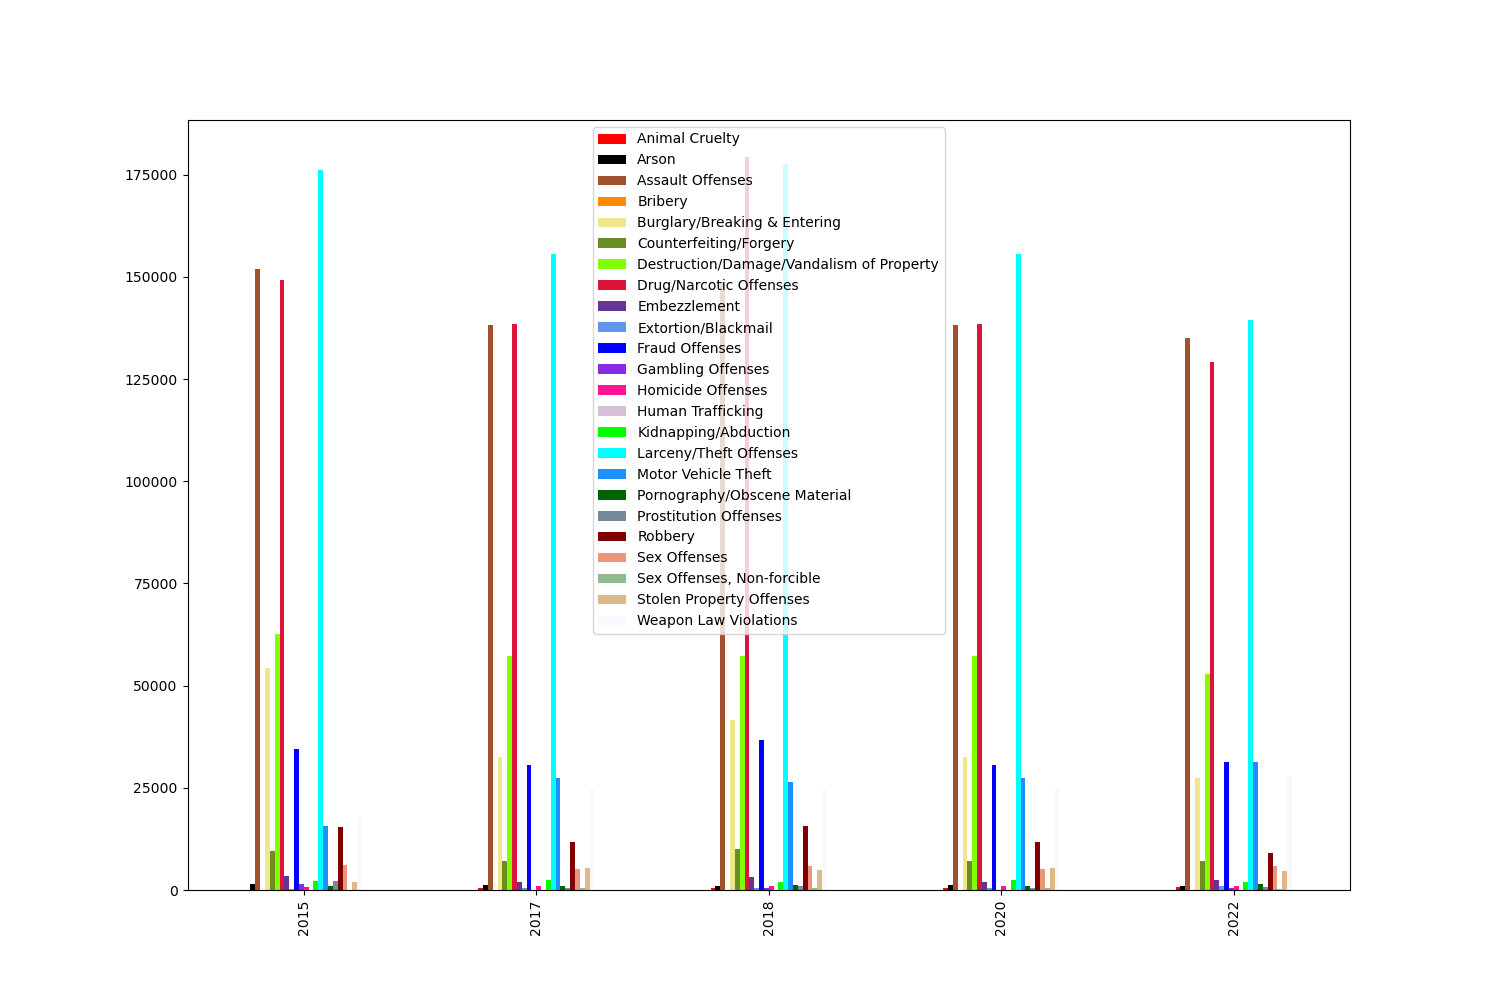

In [25]:
Offense_Type_Master.T.plot.bar(figsize = (15, 10), color = colors)
plt.legend(loc = "best")
#plt.savefig("Graphs/Offense_type_per_year.png")

In [26]:
Inc_15 = Offense_Type_Master[2015]
Inc_22 = Offense_Type_Master[2022]
st.ttest_ind(Inc_15, Inc_22, equal_var = False)

TtestResult(statistic=0.28415588021830485, pvalue=0.777604989193345, df=44.63572877672209)